## Creative Image Generation with [GANs](https://en.wikipedia.org/wiki/Generative_adversarial_network)

**Dataset:** [Flickr-Faces-HQ Dataset (FFHQ)](https://github.com/NVlabs/ffhq-dataset)

**Pre-trained Model:** [stylegan2-ada-pytorch](https://github.com/NVlabs/stylegan2-ada-pytorch)

**Clone StyleGAN2-ADA Repository**

In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128
Receiving objects: 100% (131/131), 1.13 MiB | 19.96 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
%cd stylegan2-ada-pytorch

/content/stylegan2-ada-pytorch


**Install Dependencies**

In [3]:
!pip install ninja

# Install other dependencies if necessary
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.5.1
    Uninstalling imageio-ffmpeg-0.5.1:
      Successfully uninstalled imageio-ffmpeg-0.5.1


In [4]:
import torch
import dnnlib
import legacy
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

**Load Pre-trained StyleGAN2-ADA Model**

In [5]:
# Download a pre-trained StyleGAN2 model
# !gdown "https://drive.google.com/uc?id=1OeXqsPUPTkd9OS1lPL7j5i-Xopmv-53k"  # ffhq.pkl for human faces
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl -O ffhq.pkl

--2024-06-12 16:29:07--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 3.163.158.75, 3.163.158.83, 3.163.158.113, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|3.163.158.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   105MB/s    in 3.6s    

2024-06-12 16:29:12 (100 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [6]:
# Load the model
network_pkl = "ffhq.pkl"  # path to the downloaded model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Prefer GPU for faster generation, CPU otherwise

with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # Load generator


**Images Generation and Visualization**

In [9]:
# Generate random latent vectors
z = torch.randn([1, G.z_dim]).to(device)  # Generate one image, change the first number to generate more

# Generate images
img = G(z, None)

img

tensor([[[[-0.3573, -0.4807, -0.5250,  ..., -0.1755, -0.2064, -0.2197],
          [-0.5038, -0.6286, -0.5997,  ..., -0.1744, -0.1990, -0.2176],
          [-0.5793, -0.6423, -0.6195,  ..., -0.1868, -0.2166, -0.2247],
          ...,
          [-0.6618, -0.6966, -0.6747,  ...,  0.7670,  0.7196,  0.7378],
          [-0.6246, -0.6959, -0.7171,  ...,  0.7858,  0.7502,  0.7312],
          [-0.5539, -0.7103, -0.7450,  ...,  0.7500,  0.7906,  0.7531]],

         [[-0.4241, -0.5898, -0.5999,  ..., -0.3946, -0.4344, -0.4479],
          [-0.5410, -0.6821, -0.6562,  ..., -0.3904, -0.4305, -0.4527],
          [-0.6133, -0.6856, -0.6646,  ..., -0.3982, -0.4419, -0.4507],
          ...,
          [-0.6499, -0.6922, -0.6662,  ...,  0.6750,  0.6296,  0.6181],
          [-0.6420, -0.7160, -0.7225,  ...,  0.6827,  0.6347,  0.5793],
          [-0.5995, -0.7386, -0.7414,  ...,  0.6761,  0.6841,  0.5808]],

         [[-0.4526, -0.6198, -0.6357,  ..., -0.4149, -0.4162, -0.3926],
          [-0.5051, -0.6751, -

In [12]:

# Convert images to a grid and display them
grid = make_grid(img, nrow=1, normalize=True, value_range=(-1, 1))

# Convert the grid to a format that can be displayed with matplotlib
ndarr = grid.mul(255).add(0.5).clamp(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()

ndarr

array([[[ 82,  73,  70],
        [ 66,  52,  48],
        [ 61,  51,  46],
        ...,
        [105,  77,  75],
        [101,  72,  74],
        [ 99,  70,  77]],

       [[ 63,  59,  63],
        [ 47,  41,  41],
        [ 51,  44,  44],
        ...,
        [105,  78,  72],
        [102,  73,  69],
        [100,  70,  72]],

       [[ 54,  49,  53],
        [ 46,  40,  41],
        [ 49,  43,  43],
        ...,
        [104,  77,  72],
        [100,  71,  67],
        [ 99,  70,  70]],

       ...,

       [[ 43,  45,  43],
        [ 39,  39,  37],
        [ 41,  43,  40],
        ...,
        [225, 214, 217],
        [219, 208, 215],
        [222, 206, 211]],

       [[ 48,  46,  46],
        [ 39,  36,  35],
        [ 36,  35,  33],
        ...,
        [228, 215, 219],
        [223, 208, 221],
        [221, 201, 206]],

       [[ 57,  51,  57],
        [ 37,  33,  35],
        [ 33,  33,  31],
        ...,
        [223, 214, 217],
        [228, 215, 220],
        [224, 202, 200]]

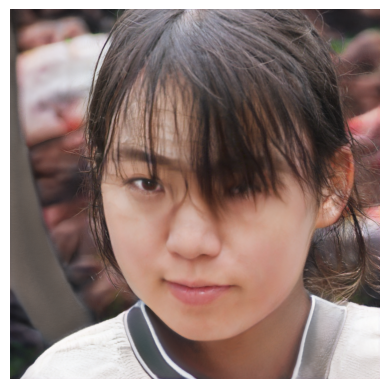

In [13]:
plt.imshow(ndarr)
plt.axis('off')
plt.show()


## Styling Techniques
1. **Latent Space Interpolation:** Interpolate between two latent vectors to generate *intermediate* images.
2. **Latent Vector Manipulation:** Adjust specific dimensions of the latent vector to change attributes like *age, gender, expression*, etc.
3. **Style Mixing:** Mix styles from different latent vectors to create a new image.

**1. Latent Space Interpolation**

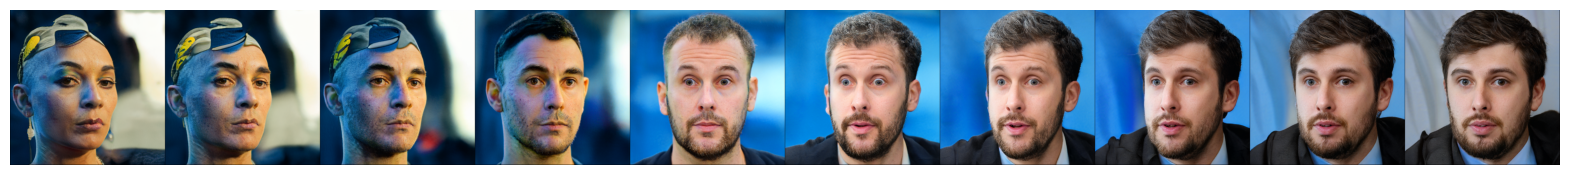

In [14]:
import numpy as np

# Generate two random latent vectors
z1 = torch.randn([1, G.z_dim]).to(device)
z2 = torch.randn([1, G.z_dim]).to(device)

# Interpolate between the two latent vectors
num_steps = 10
interpolated_images = []
for i in range(num_steps):
    alpha = i / (num_steps - 1)
    z = alpha * z1 + (1 - alpha) * z2
    img = G(z, None)
    interpolated_images.append(img)

# Display the interpolated images
grid = make_grid(torch.cat(interpolated_images), nrow=num_steps, normalize=True, value_range=(-1, 1))
ndarr = grid.mul(255).add(0.5).clamp(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()

plt.figure(figsize=(20, 10))
plt.imshow(ndarr)
plt.axis('off')
plt.show()


**2. Latent Vector Manipulation**

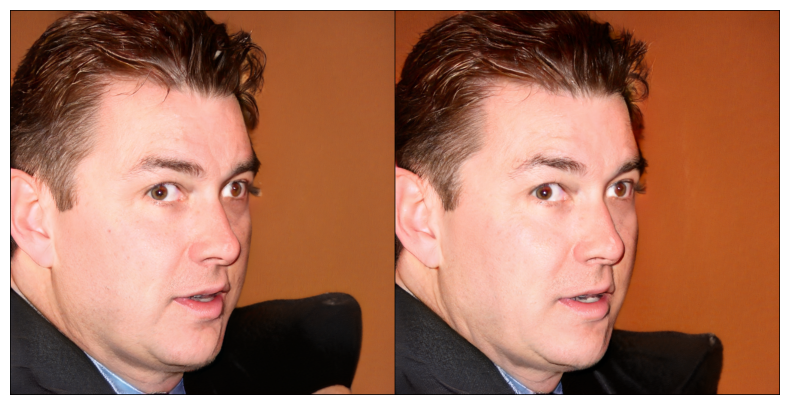

In [15]:
# Generate a random latent vector
z = torch.randn([1, G.z_dim]).to(device)

# Apply manipulations to the latent vector (example: add a small random noise)
delta = torch.randn([1, G.z_dim]).to(device) * 0.1  # Adjust the scale for the desired effect
manipulated_z = z + delta

# Generate images from the original and manipulated latent vectors
img_original = G(z, None)
img_manipulated = G(manipulated_z, None)

# Display the original and manipulated images
grid = make_grid(torch.cat([img_original, img_manipulated]), nrow=2, normalize=True, value_range=(-1, 1))
ndarr = grid.mul(255).add(0.5).clamp(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()

plt.figure(figsize=(10, 5))
plt.imshow(ndarr)
plt.axis('off')
plt.show()


**3. Style Mixing**

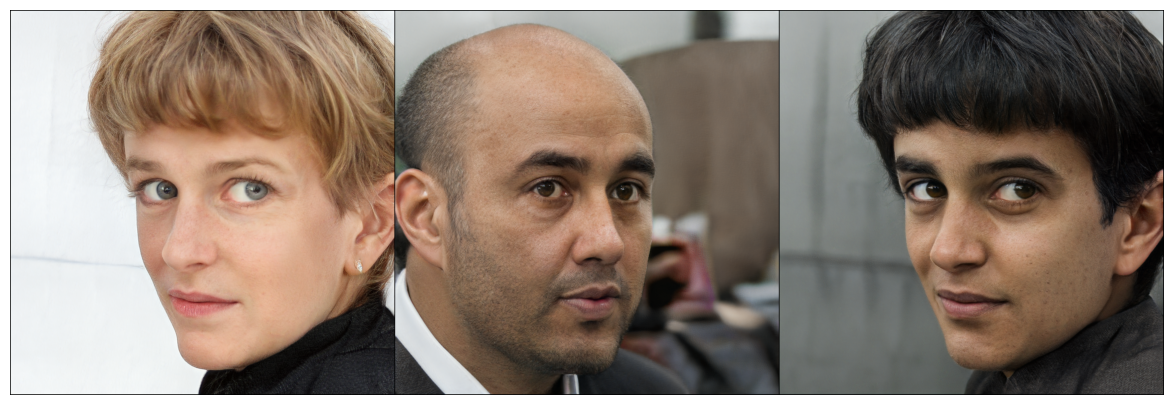

In [16]:
# Generate two random latent vectors
z1 = torch.randn([1, G.z_dim]).to(device)
z2 = torch.randn([1, G.z_dim]).to(device)

# Define a function to perform style mixing
def style_mixing(z1, z2, layer_idx):
    ws1 = G.mapping(z1, None)
    ws2 = G.mapping(z2, None)
    ws = ws1.clone()
    ws[:, layer_idx:] = ws2[:, layer_idx:]
    img = G.synthesis(ws)
    return img

# Generate images with style mixing at different layers
layer_idx = 7  # Change this to mix styles at different layers
img_mixed = style_mixing(z1, z2, layer_idx)

# Display the original and mixed images
img1 = G(z1, None)
img2 = G(z2, None)
grid = make_grid(torch.cat([img1, img2, img_mixed]), nrow=3, normalize=True, value_range=(-1, 1))
ndarr = grid.mul(255).add(0.5).clamp(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()

plt.figure(figsize=(15, 5))
plt.imshow(ndarr)
plt.axis('off')
plt.show()


## References
- [Training Generative Adversarial Networks with Limited Data - Paper](https://arxiv.org/pdf/1711.11479)
- [How to Explore the GAN Latent Space When Generating Faces - MLM](https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/)
- [GAN + Latent Space - @Yasha Jain](https://medium.com/@jain.yasha/gan-latent-space-1b32cd34cfda)
